In [1]:
# Warning
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np 
import pandas as pd

# Statistics
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats import mannwhitneyu

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualiation options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

sns.set_style('white')

# Set notebook options
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', 100) # display 100 rows

#### Load the data

In [2]:
bank_customer = pd.read_csv('bank_customer.csv')
df = bank_customer.copy()
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.shape

(10000, 14)

    - The dataset contains 10,000 entries and 14 features.
    - Each entry (i.e. row) represents a single customer of the bank.
    - The features (i.e. columns) are the attributes, in this case, customer information collected by the bank).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


    - The dataset doesn't have any missing values.
    - The dataset contains mixed data types, most (11) are numerical while the remainder (3) are catergorical.

In [5]:
missing = df.isna()
missing.any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

    - We can confirm that the dataset has no missing values.

In [6]:
duplicates = df.duplicated()
duplicates.any()

False

    - The dataset contains no duplicate values.

In [7]:
constants = df.nunique()
constants = [i for i, v in enumerate(constants) if v == 1]
constants

[]

    - The dataset doesn't appear to have any constant (i.e. single value columns) features.

In [8]:
uniques = df.nunique()
uniques

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

    - 'RowNumber' and 'CustomerID' are irrelevant features and should be dropped from the dataset. 
    - We will also drop the 'Surname' feature to keep the data anonomous.

In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [10]:
df.shape

(10000, 11)

    - The number of features is now 11, down from the 14 we had initially.

In [11]:
df.describe(include='all').T

count unique     top  freq           mean           std  \
CreditScore      10000.0    NaN     NaN   NaN       650.5288     96.653299   
Geography          10000      3  France  5014            NaN           NaN   
Gender             10000      2    Male  5457            NaN           NaN   
Age              10000.0    NaN     NaN   NaN        38.9218     10.487806   
Tenure           10000.0    NaN     NaN   NaN         5.0128      2.892174   
Balance          10000.0    NaN     NaN   NaN   76485.889288  62397.405202   
NumOfProducts    10000.0    NaN     NaN   NaN         1.5302      0.581654   
HasCrCard        10000.0    NaN     NaN   NaN         0.7055       0.45584   
IsActiveMember   10000.0    NaN     NaN   NaN         0.5151      0.499797   
EstimatedSalary  10000.0    NaN     NaN   NaN  100090.239881  57510.492818   
Exited           10000.0    NaN     NaN   NaN         0.2037      0.402769   

                   min       25%         50%          75%        max  
CreditScore      350.0     584.0       652.0        718.0      850.0  
Geography          NaN       NaN         NaN          NaN        NaN  
Gender             NaN       NaN         NaN          NaN        NaN  
Age               18.0      32.0        37.0         44.0       92.0  
Tenure             0.0       3.0         5.0          7.0       10.0  
Balance            0.0       0.0    97198.54    127644.24  250898.09  
NumOfProducts      1.0       1.0         1.0          2.0        4.0  
HasCrCard          0.0       0.0         1.0          1.0        1.0  
IsActiveMember     0.0       0.0         1.0          1.0        1.0  
EstimatedSalary  11.58  51002.11  100193.915  149388.2475  199992.48  
Exited             0.0       0.0         0.0          0.0        1.0

# Exploratory Data Analysis

In [12]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

## Target Feature

    - The target feature is 'Exited'.
    - It has already been converted to numerical, with 0 denoting those customers who did not exit (i.e. retained) and 1 denoting those customers who exited (i.e. churned).

In [13]:
df['Exited'].dtype

dtype('int64')

In [14]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
df['Exited'].value_counts(normalize=True) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [16]:
number_retained = df['Exited'].value_counts()[0]
percent_retained = df['Exited'].value_counts(normalize=True)[0] * 100
print(f'Number of cutomers who retained: {number_retained}')
print(f'Percentage of customers who retained: {round(percent_retained, 2)} %')

Number of cutomers who retained: 7963
Percentage of customers who retained: 79.63 %


In [17]:
number_exited = df['Exited'].value_counts()[1]
percent_exited = df['Exited'].value_counts(normalize=True)[1] * 100
print(f'Number of cutomers who exited: {number_exited}')
print(f'Percentage of customers who exited: {round(percent_exited, 2)} %')

Number of cutomers who exited: 2037
Percentage of customers who exited: 20.37 %


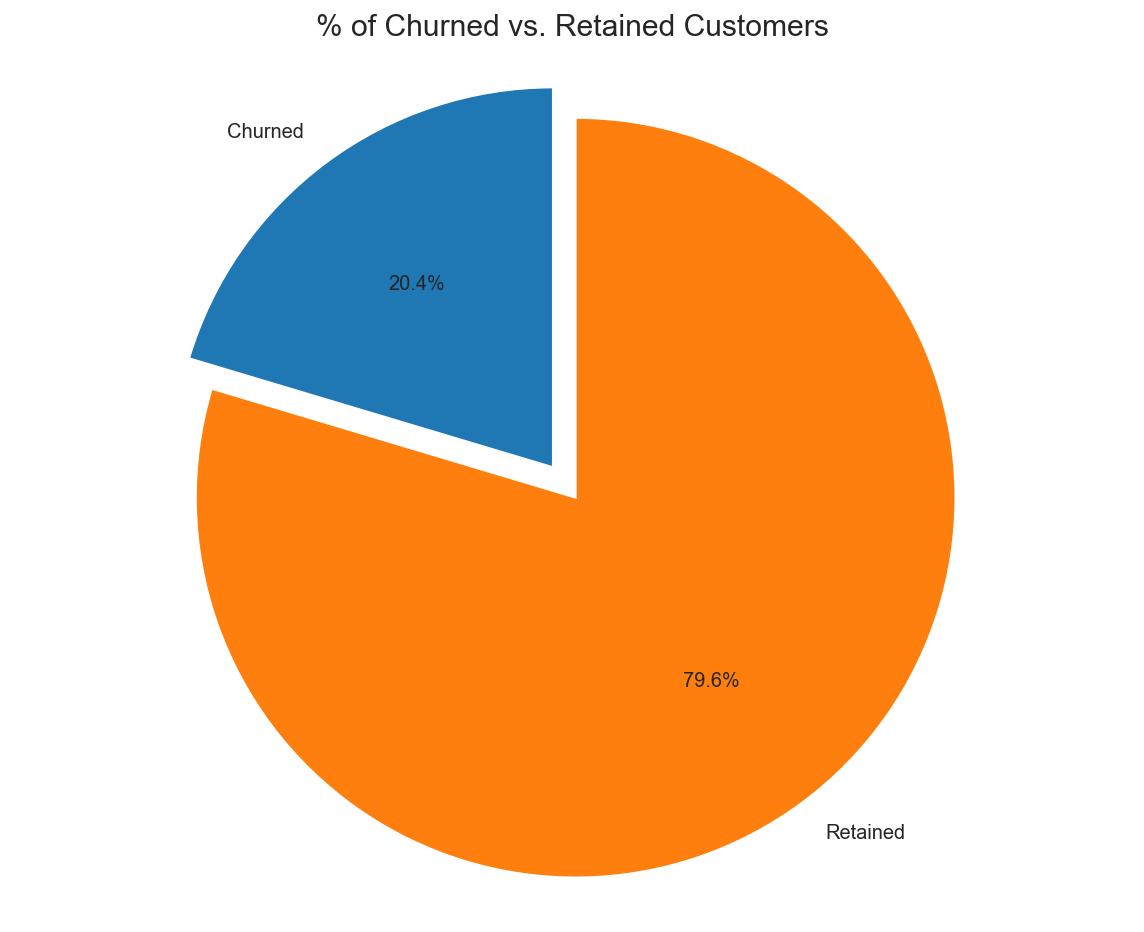

In [18]:
labels = 'Churned', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.title('% of Churned vs. Retained Customers', size=15)
plt.show()

      - 20.4% of customers churned while 79.6% of customers were retained.
      - The target feature is imbalanced.

## Numerical Features

In [19]:
num = df.select_dtypes(include='number')
num.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

In [20]:
len(num.columns)

9

#### Statistical Summary

In [21]:
num.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

#### Numerical Distributions

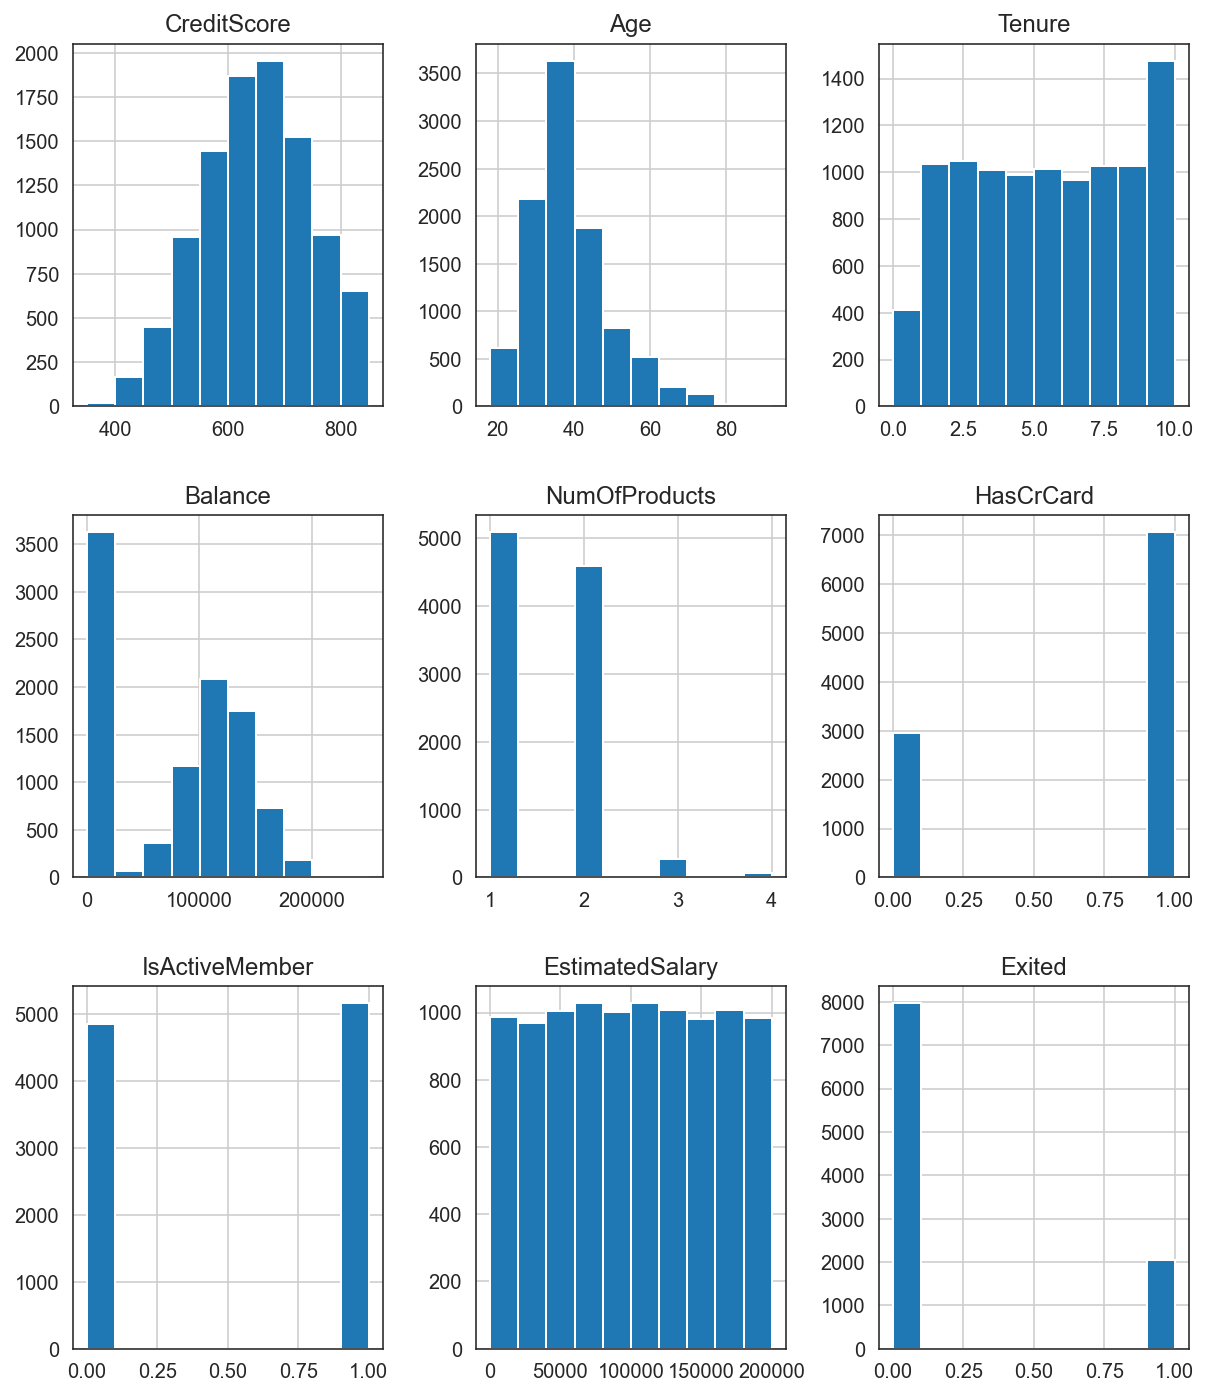

In [22]:
num.hist(figsize=(10, 12));

In [23]:
num.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

    - We are dealing with skewed numerical features.

#### Numerical Distribution vs. Target Feature

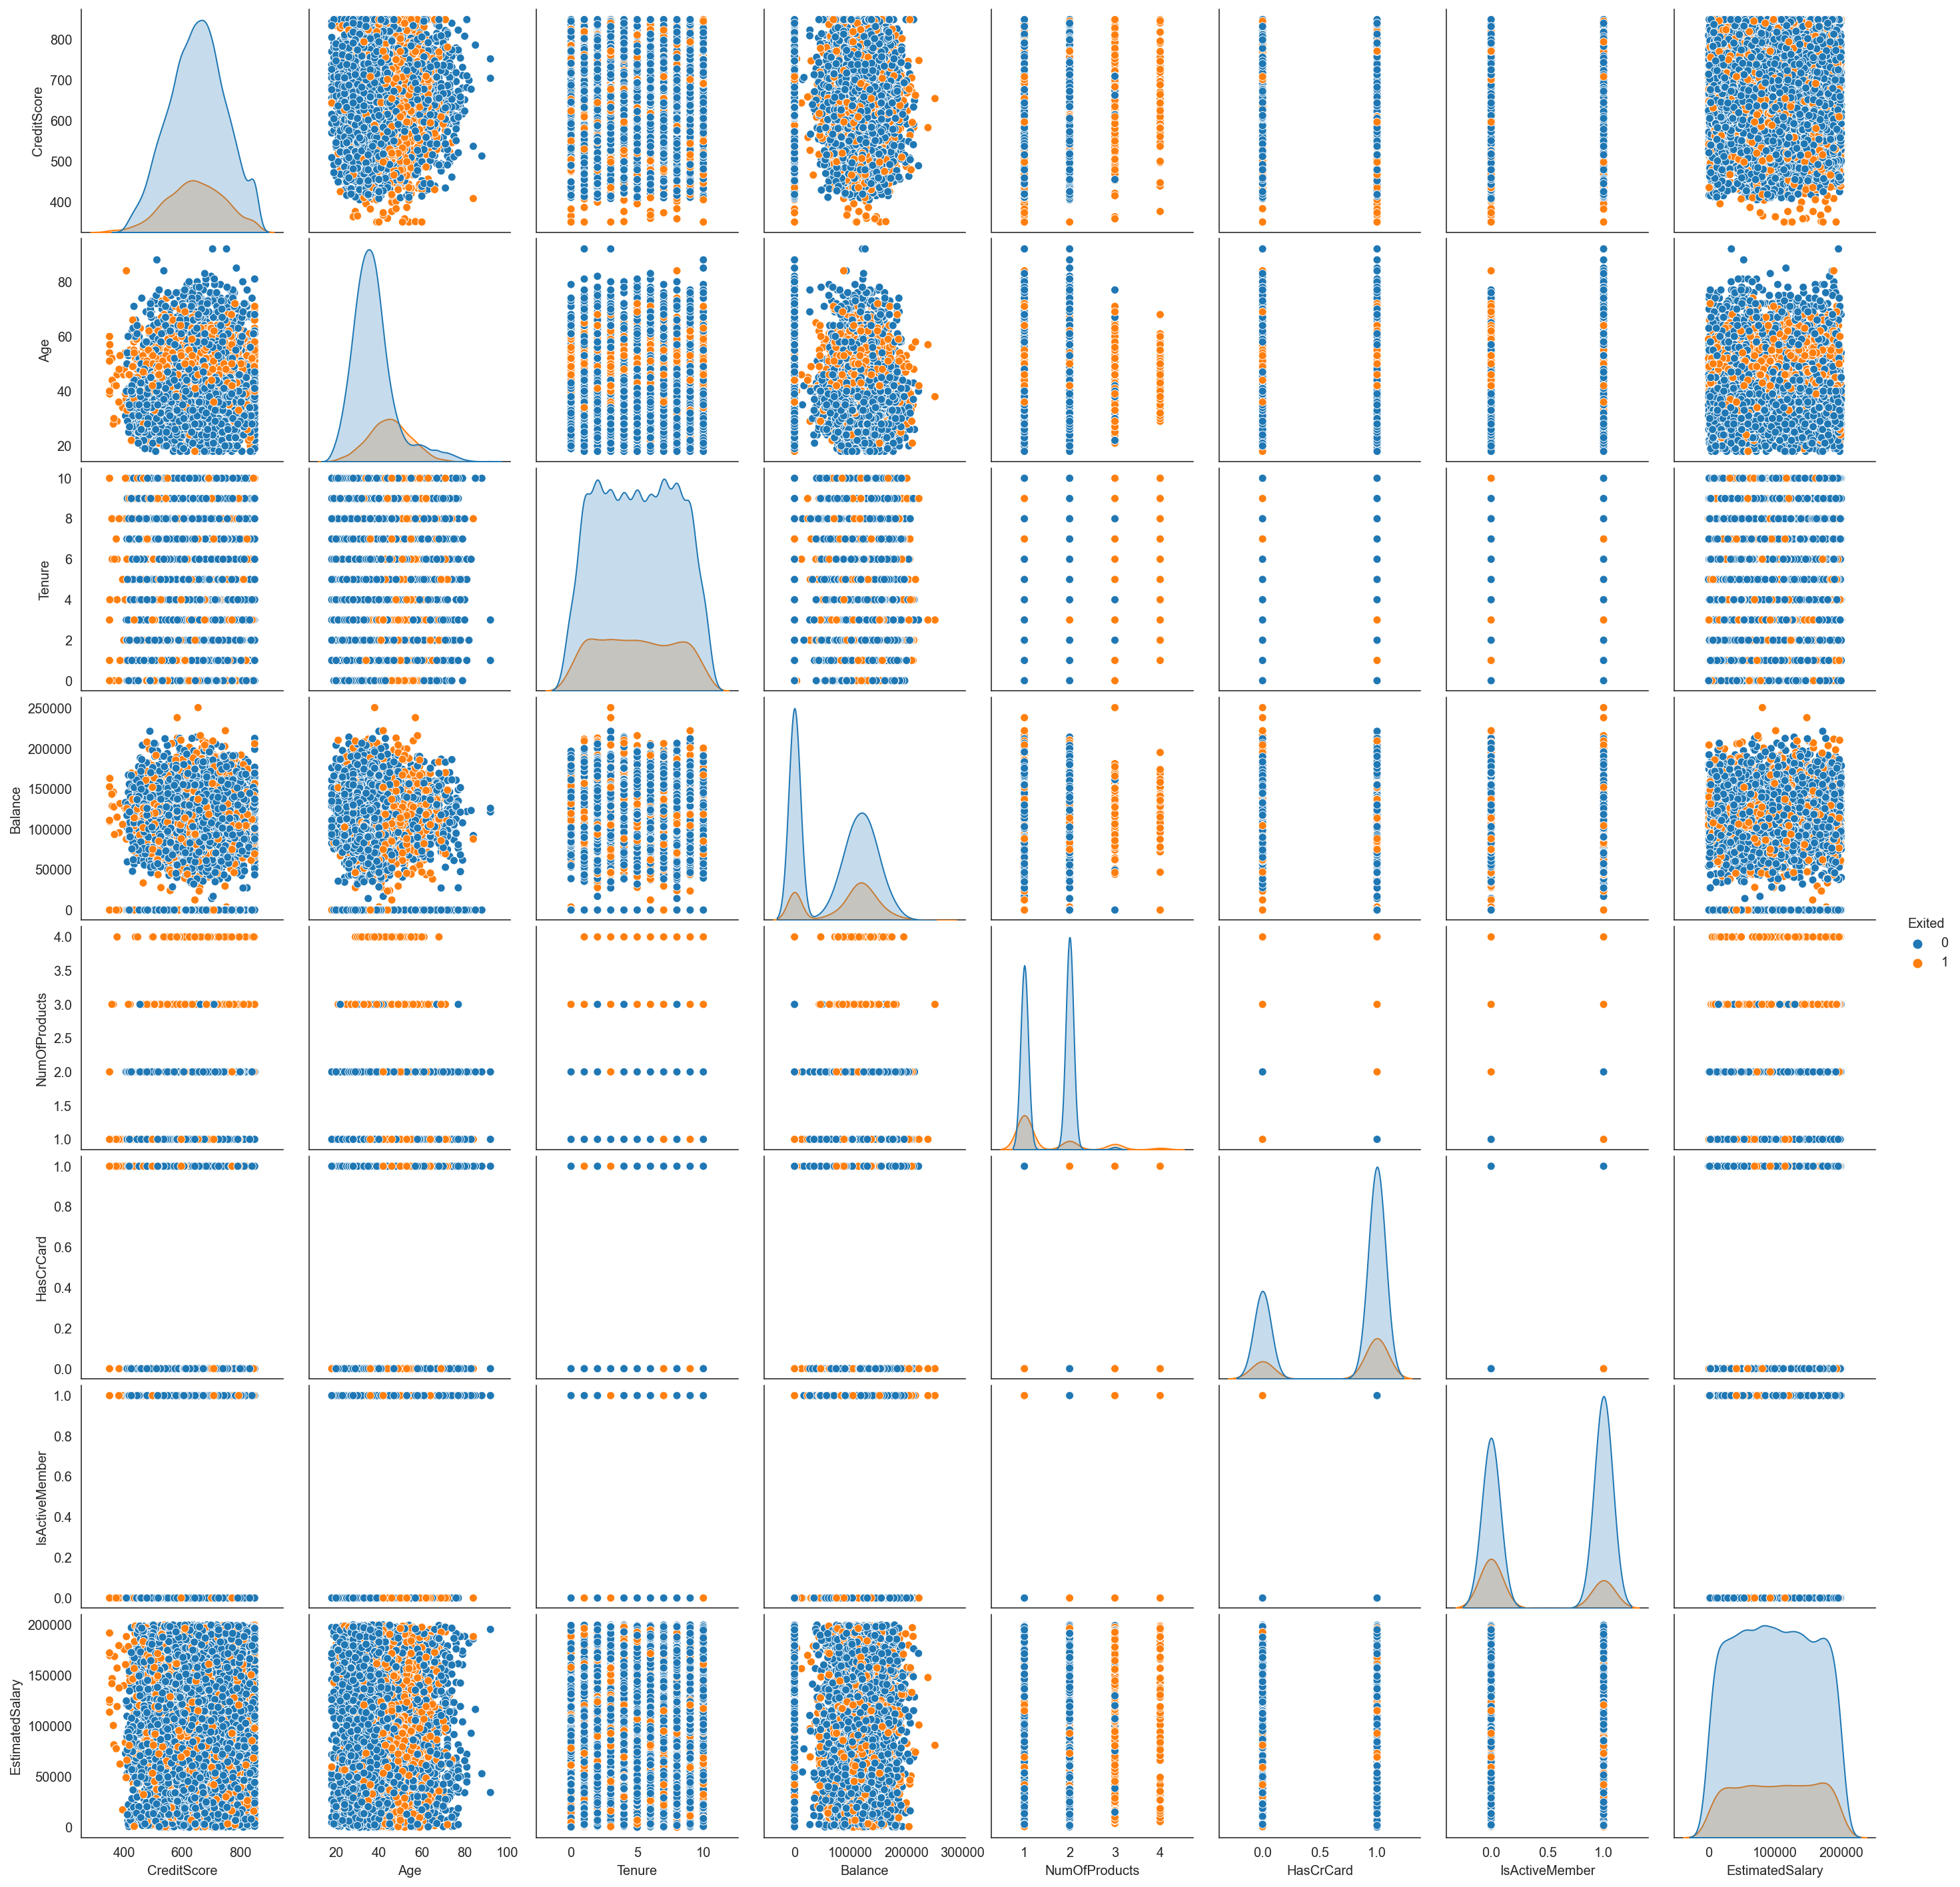

In [24]:
sns.pairplot(data=num, hue='Exited');

##### BoxPlots

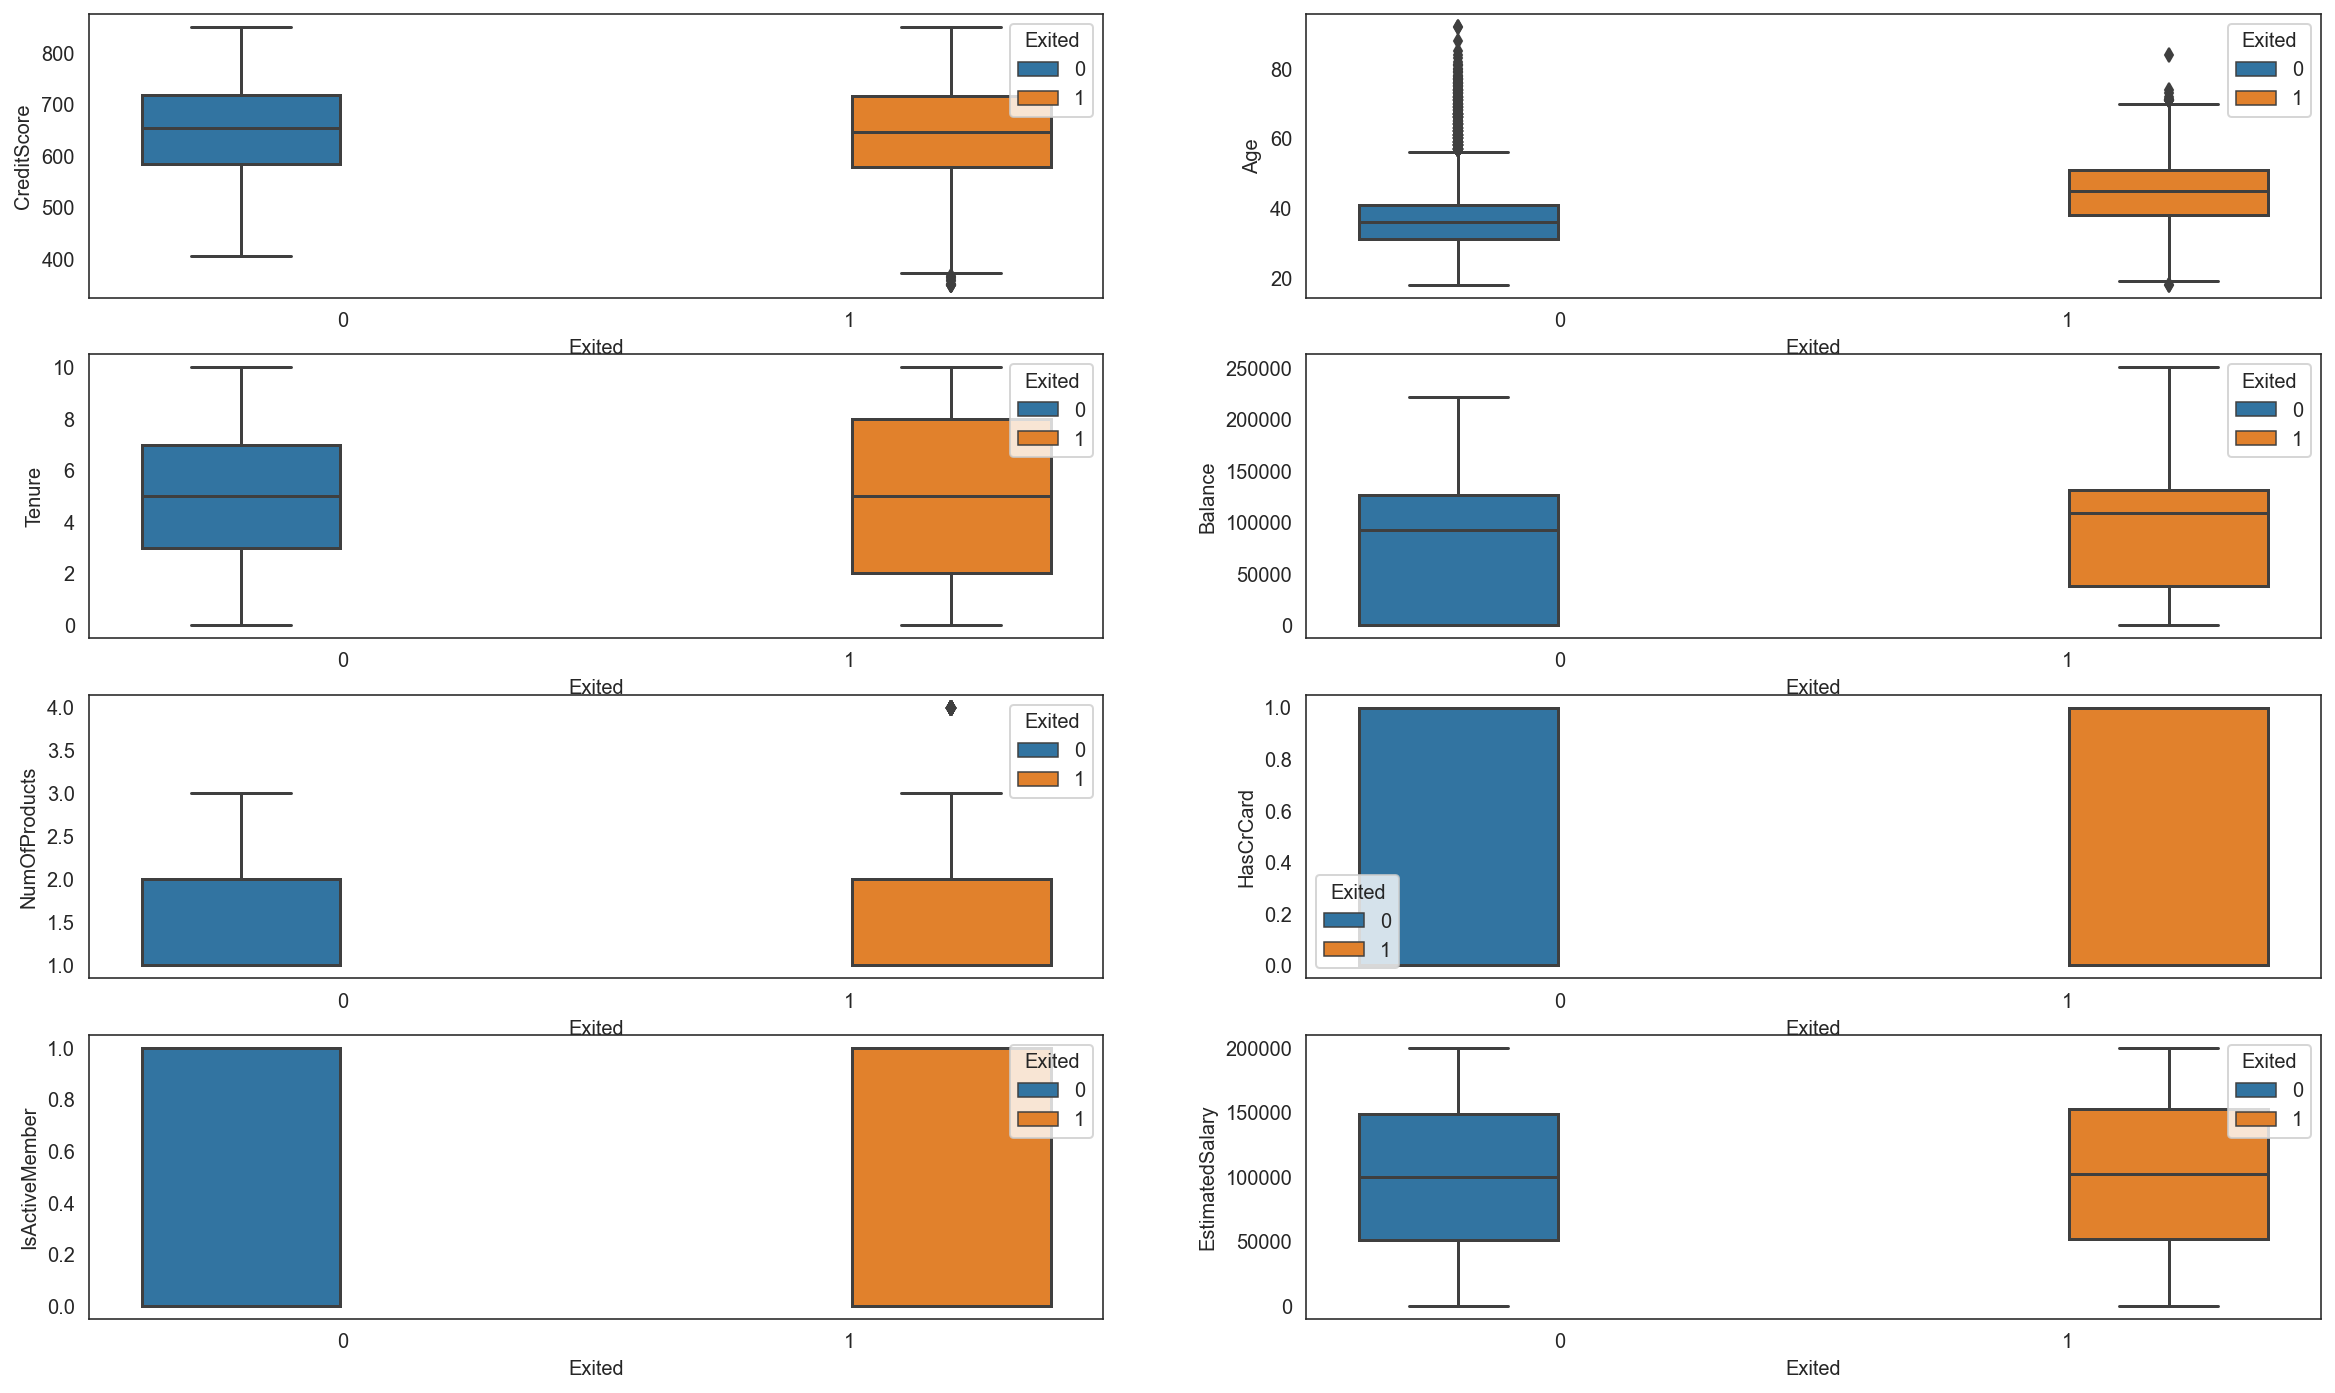

In [25]:
fig, axarr = plt.subplots(4, 2, figsize=(20, 12))
sns.boxplot(data=num, x='Exited', y='CreditScore', hue='Exited', ax=axarr[0][0])
sns.boxplot(data=num, x='Exited', y='Age', hue='Exited', ax=axarr[0][1])
sns.boxplot(data=num, x='Exited', y='Tenure', hue='Exited', ax=axarr[1][0])
sns.boxplot(data=num, x='Exited', y='Balance', hue='Exited', ax=axarr[1][1])
sns.boxplot(data=num, x='Exited', y='NumOfProducts', hue='Exited', ax=axarr[2][0])
sns.boxplot(data=num, x='Exited', y='HasCrCard', hue='Exited', ax=axarr[2][1])
sns.boxplot(data=num, x='Exited', y='IsActiveMember', hue='Exited', ax=axarr[3][0])
sns.boxplot(data=num, x='Exited', y='EstimatedSalary', hue='Exited', ax=axarr[3][1]);

    - 'CreditScore': Customers' credit score doesn't seem to affect churn.
    - 'Age': Older customers are more likely to churn than younger customers.
    - 'Tenure': Customers who spent little time with the bank and customers who have been with the bank the longest are more likely to churn than those with an average tenure.
    - 'Balance': Customers with higher balances are more likely to churn.
    - 'NumOfProducts': The number of products a customer has with the bank doesn't seem to influence churn.
    - 'EstimatedSalary': Customers salary does not seem to affect churn.
    
    Note:
    - From the above, it appears that two numerical features ('HasCrCard') and ('IsActiveMemeber') are in fact categorical features. We'll look at theses more in-depth when we visualize categorical features.

#### Numerical Relationships

In [26]:
corr_matrix = num.corr()
corr_matrix

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

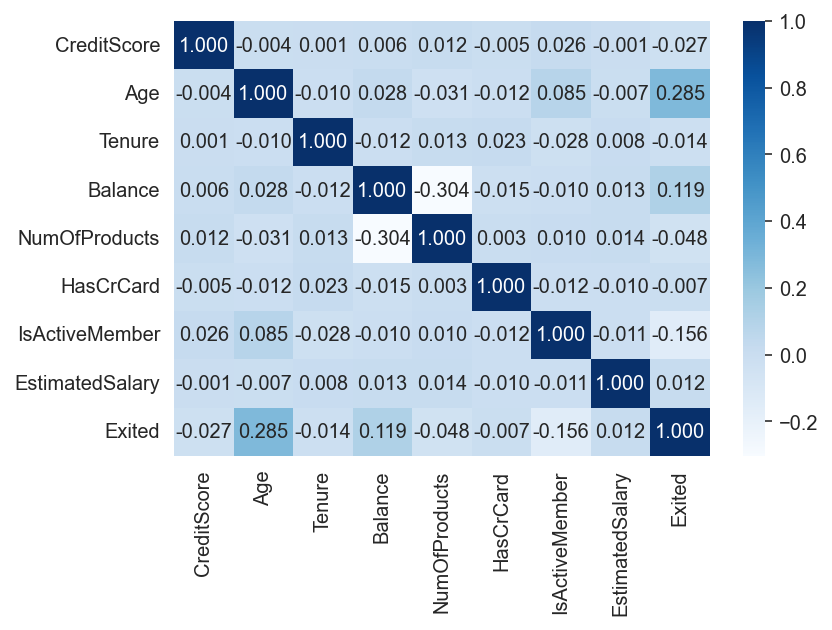

In [27]:
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='Blues');

## Categorical Features

In [28]:
cat = df.select_dtypes(include='object')
cat.head()

Geography  Gender
0    France  Female
1     Spain  Female
2    France  Female
3    France  Female
4     Spain  Female

    - We have two categorical variables: 'Geography' and 'Gender'

#### Statistical Summary

In [29]:
cat.describe()

Geography Gender
count      10000  10000
unique         3      2
top       France   Male
freq        5014   5457

    - 'Geography': consists of 3 unique values, the top value is France with 5014 total entries.
    - 'Gender': consists of 2 unique values, the top value is Male with 5457 total entires.

#### Categorical Distributions

In [30]:
for col in cat.columns:
    print(col)
    print()
    print(cat[col].value_counts()) 
    print(10 *'-')
    print()

Geography

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------

Gender

Male      5457
Female    4543
Name: Gender, dtype: int64
----------



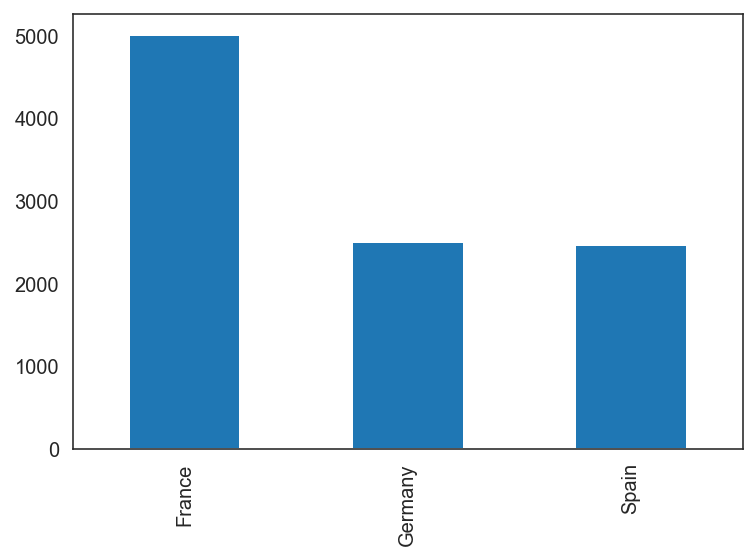

In [31]:
cat['Geography'].value_counts().plot.bar();

<AxesSubplot:>

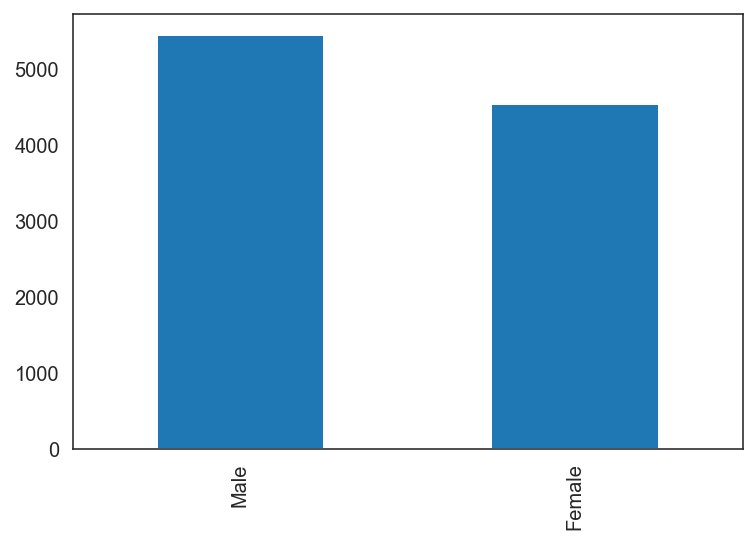

In [32]:
cat['Gender'].value_counts().plot.bar()

In [33]:
for col in cat.columns:
    print(col)
    print()
    print(cat[col].value_counts(normalize=True) * 100)
    print(10 *'-')
    print()

Geography

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64
----------

Gender

Male      54.57
Female    45.43
Name: Gender, dtype: float64
----------



<AxesSubplot:>

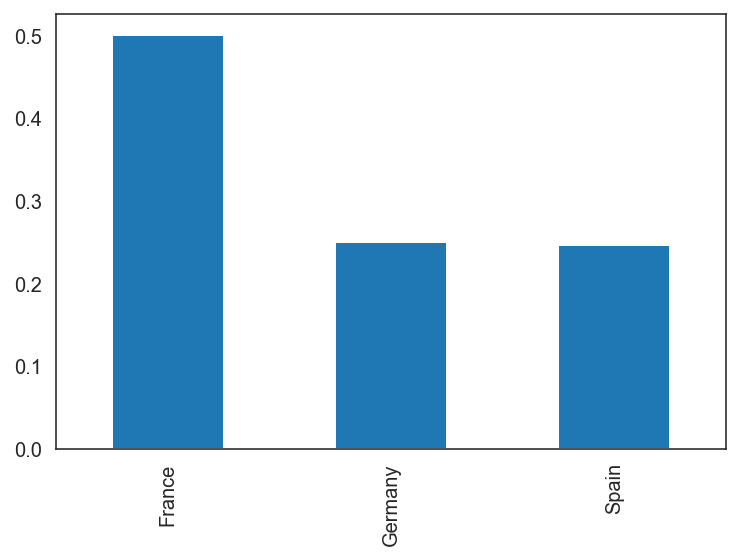

In [34]:
cat['Geography'].value_counts(normalize=True).plot.bar()

<AxesSubplot:>

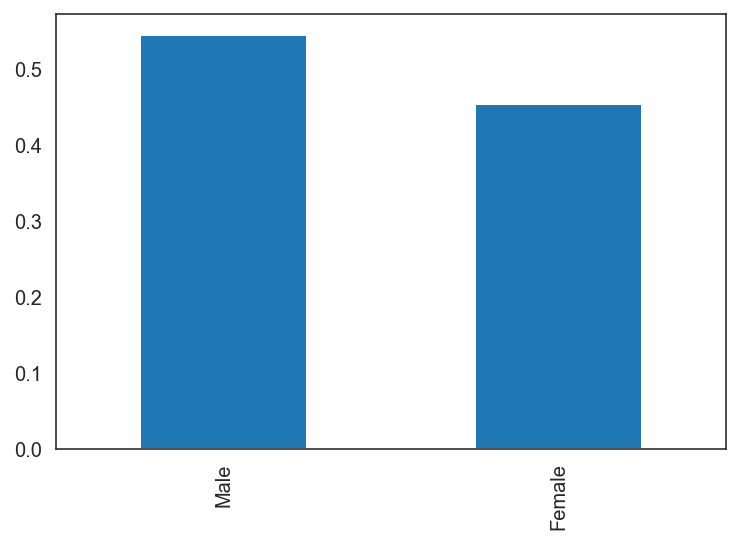

In [35]:
cat['Gender'].value_counts(normalize=True).plot.bar()

    - Half, 50.14% (5014 in total) of customers are from France, with an almost even split 25.09% (2509) from Germany, and 24.77% (2477) from Spain.
    - 54.57% (5457 in total) of customers are male, while 45.43% (4543) are female.

### Categorical Features vs Target Feature

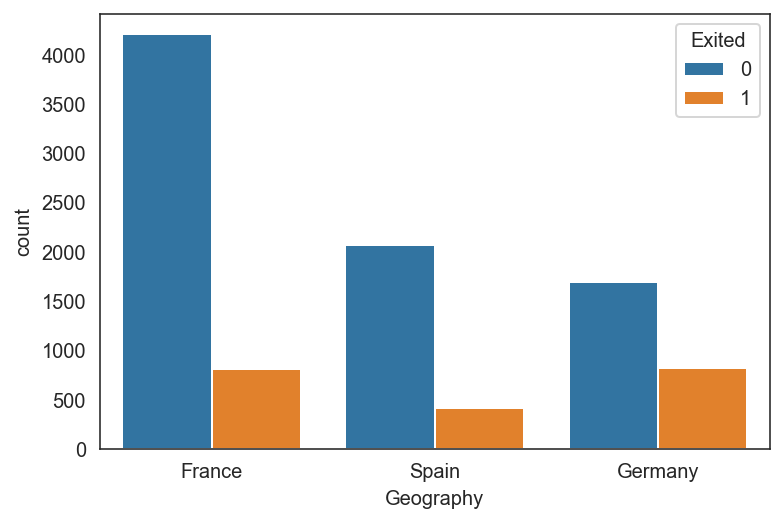

In [36]:
sns.countplot(data=cat, x='Geography', hue=df['Exited']);

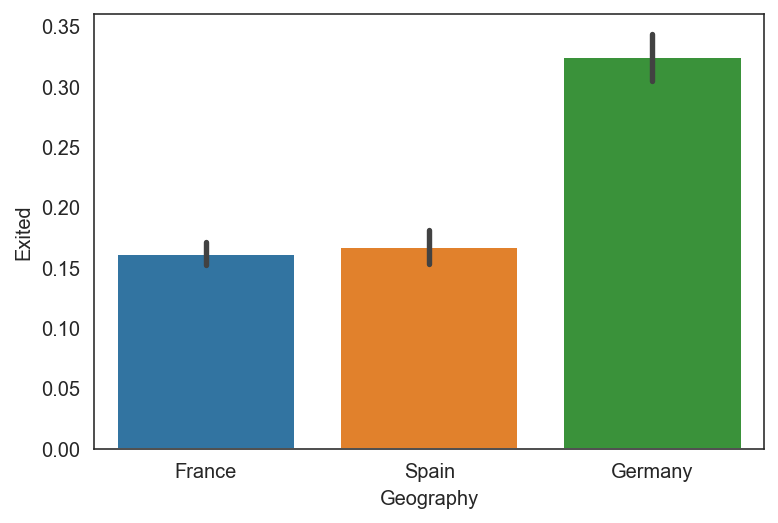

In [37]:
sns.barplot(data=cat, x='Geography', y=df['Exited']);

    - German customers with a churn rate of (~ 32%), churn the most. 
    - The churn rate (~ 15%) is similair between French and Spanish customers.

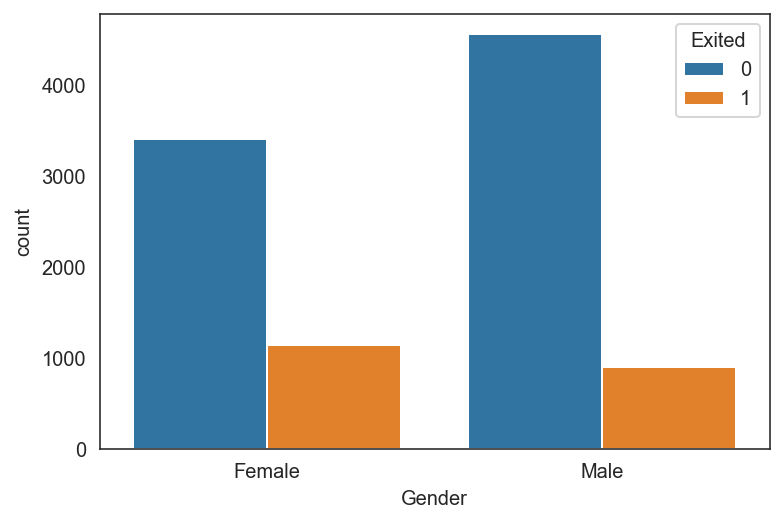

In [38]:
sns.countplot(data=cat, x='Gender', hue=df['Exited']);

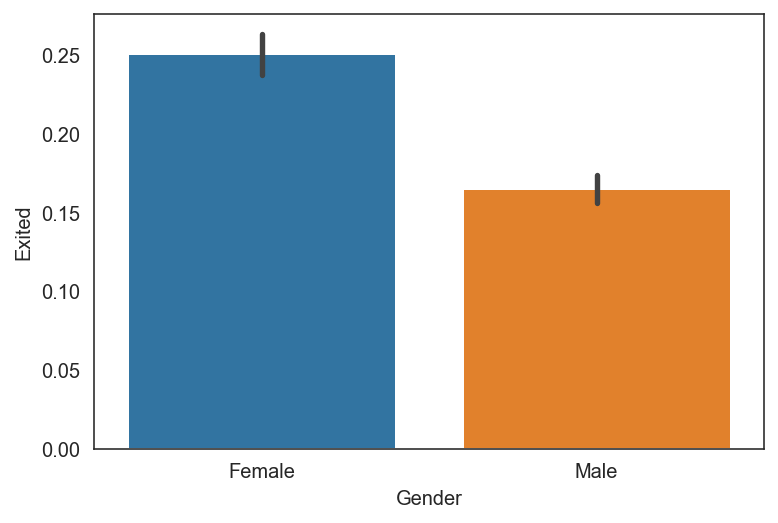

In [39]:
sns.barplot(data=cat, x='Gender', y=df['Exited']);

    - Female customers have a higher churn rate than male customers (~ 25% vs. ~17%).

##### Let's look at 'HasCrCard'

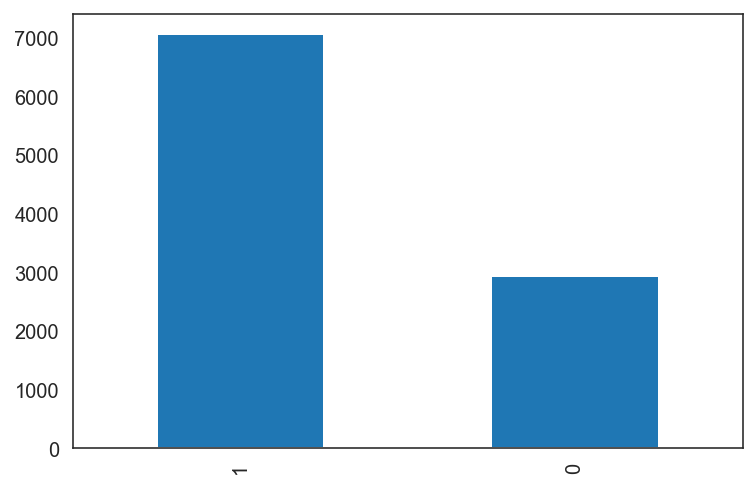

In [40]:
num['HasCrCard'].value_counts().plot.bar();

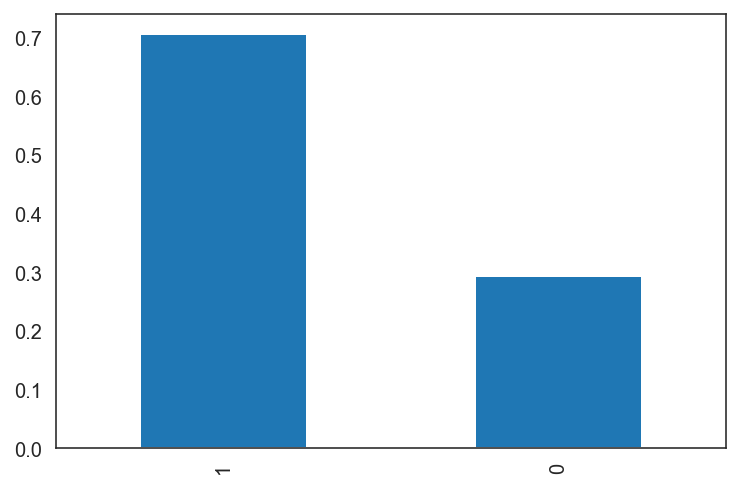

In [41]:
num['HasCrCard'].value_counts(normalize=True).plot.bar();

    - 70% of customers have a credit card with the bank.

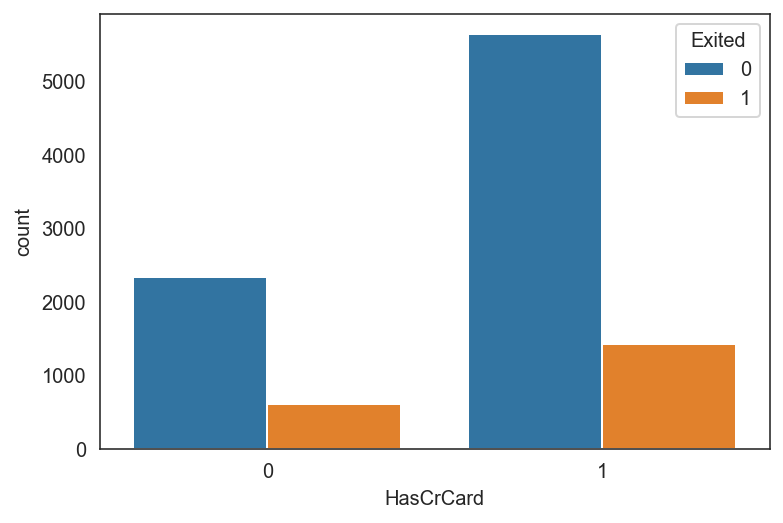

In [42]:
sns.countplot(data=num, x='HasCrCard', hue='Exited');

<AxesSubplot:xlabel='HasCrCard', ylabel='Exited'>

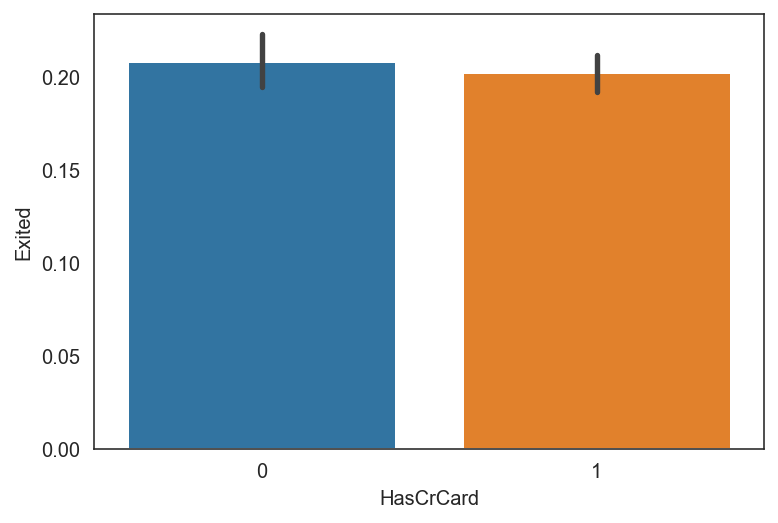

In [43]:
sns.barplot(data=num, x='HasCrCard', y='Exited')

    - The churn rate is slighlty higher (~22%) for customers who do not have a credit card with the bank than for customers who have a credit card with the bank.

##### Let's look at 'IsActiveMember'

In [44]:
num['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [45]:
num['IsActiveMember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

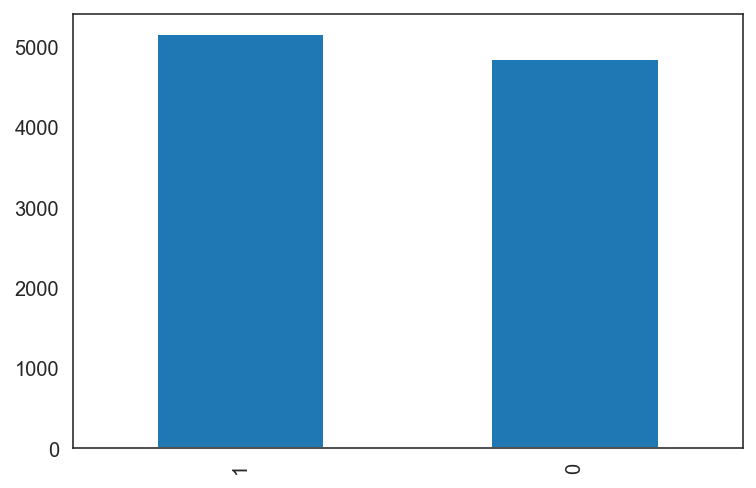

In [46]:
num['IsActiveMember'].value_counts().plot.bar();

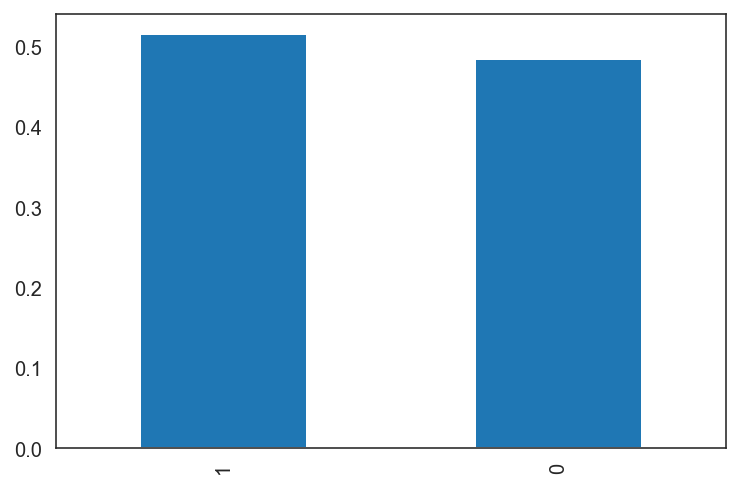

In [47]:
num['IsActiveMember'].value_counts(normalize=True).plot.bar();

    - Roughly even split between if a customer is an active member or not with slightly more active members than 
    non members.

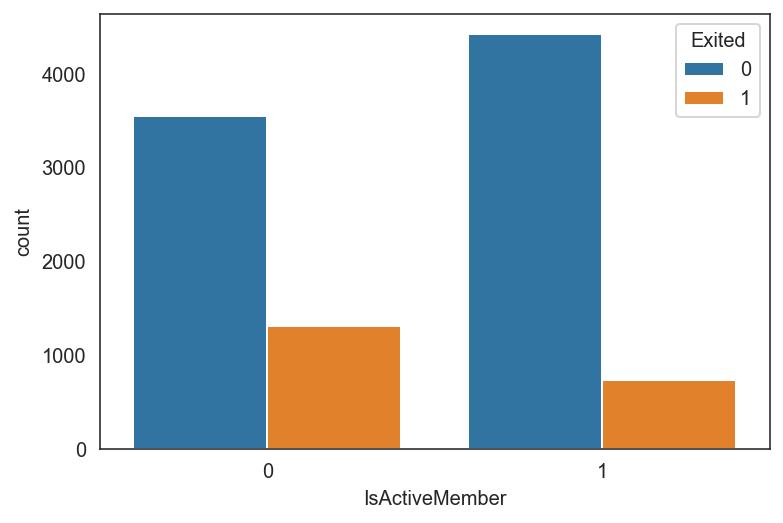

In [48]:
sns.countplot(data=num, x='IsActiveMember', hue='Exited');

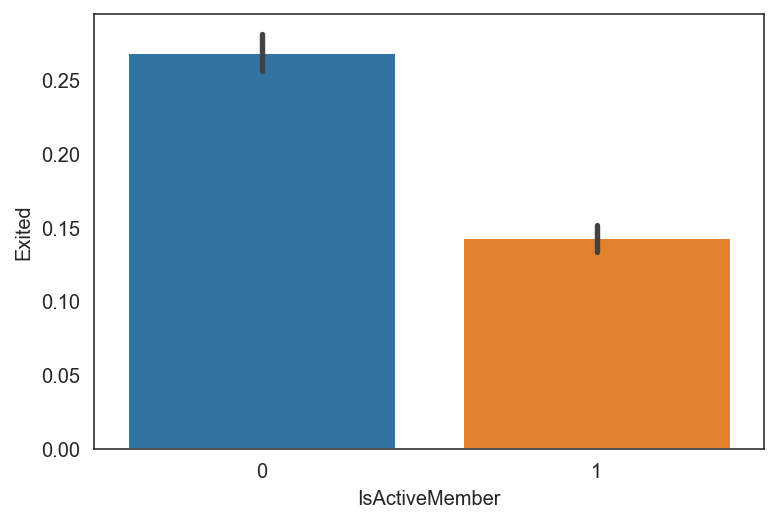

In [49]:
sns.barplot(data=num, x='IsActiveMember', y='Exited');

    - Non members churn more than active members.

#### Relationship

In [50]:
from sklearn.metrics import mutual_info_score

def cat_mut_inf(series):
    return mutual_info_score(series, df['Exited']) 

cat_mut_info = cat.apply(cat_mut_inf) 
cat_mut_info = cat_mut_info.sort_values(ascending=False).to_frame(name='Mutual Info Score') 
cat_mut_info

Mutual Info Score
Geography           0.014017
Gender              0.005652

## Data Preparation

In [51]:
# Preprocessing 
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, OrdinalEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score

# Metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

##### Let's quickly look at the dataset

In [52]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [53]:
df.shape

(10000, 11)

##### Split the dataset into train and test set

In [54]:
train, test = train_test_split(df, test_size=.20, random_state=999)
print('The shape of the train set:', train.shape)
print('The shape of the test set:', test.shape)

The shape of the train set: (8000, 11)
The shape of the test set: (2000, 11)


##### Partition the data into features (X) and target (y)

In [55]:
train.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8007          647    France    Male   41       4  138937.35              1   
9688          850    France    Male   68       5  169445.40              1   
519           707    France    Male   58       6   89685.92              1   
3830          850    France  Female   29      10       0.00              2   
4057          510    France  Female   26       6  136214.08              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
8007          1               1        101617.64       1  
9688          1               1        186335.07       0  
519           0               1        126471.13       0  
3830          1               1        199775.67       0  
4057          0               0        159742.33       0

In [56]:
X = train.drop('Exited', axis=1)
y = train['Exited']
print('The shape of X:', X.shape)
print('The shape of y:', y.shape)

The shape of X: (8000, 10)
The shape of y: (8000,)


##### Divide into numerical and categorical features

In [57]:
num_selector = selector(dtype_exclude=object)
num = num_selector(X)

cat_selector = selector(dtype_include=object)
cat = cat_selector(X)

##### Split into training and testing sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=999)

# Modeling

## Model Selection

    We will try the following models:
        - Linear Model (Logistic Regression)
        - Ensemble Model (Random Forest)
        - Boosting Model (History Gradient Boosting)

## Metric Selection

    The target feature 'Exited' is imbalanced, so we'll use 'roc-auc' metric for model evaluation. 
    We'll also take a look at the 'classification_report', 'precision' and 'recall' metrics on the test set.

## 1. Logistic Regression

In [59]:
cat_preprocessor = OneHotEncoder(handle_unknown='ignore')
num_preprocessor = StandardScaler()

ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat),
    ('num', num_preprocessor, num)
])

In [60]:
logreg = LogisticRegression(solver='liblinear', random_state=999)

logreg_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', logreg)
])

In [61]:
# logreg_pipe.get_params()

In [62]:
logreg_param_grid = {
    'model__C': [0.1, 0.5, 1, 10, 50, 100],
    'model__max_iter': range(50, 500, 50),
    'model__penalty': ['l1', 'l2']
}

In [63]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=999)
metric = 'roc_auc'

In [64]:
logreg_gs = GridSearchCV(
    logreg_pipe,
    param_grid=logreg_param_grid,
    scoring=metric,
    cv=skfold,
    n_jobs=-1,
    verbose=1,
)

In [65]:
%%time
logreg_gs.fit(X_train, y_train);

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
CPU times: user 2.87 s, sys: 269 ms, total: 3.14 s
Wall time: 34.5 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          

In [66]:
print(f'Best Logistic Regression Parameters:\n{logreg_gs.best_params_}')

Best Logistic Regression Parameters:
{'model__C': 0.1, 'model__max_iter': 50, 'model__penalty': 'l1'}


In [67]:
print(f'Best Logistic Regression AUC Accuracy:\n{logreg_gs.best_score_:.2f}%')

Best Logistic Regression AUC Accuracy:
0.76%


In [68]:
print('Logistic Regression Results:')
logreg_results = pd.DataFrame(logreg_gs.cv_results_)
logreg_results

Logistic Regression Results:


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.053270      0.004586         0.011462        0.001626   
1         0.035235      0.004010         0.009032        0.000800   
2         0.058649      0.003348         0.011025        0.002285   
3         0.033334      0.003830         0.008777        0.000792   
4         0.059188      0.005932         0.010376        0.001093   
..             ...           ...              ...             ...   
103       0.037024      0.001815         0.010040        0.001570   
104       0.033467      0.000992         0.011339        0.002067   
105       0.036336      0.002356         0.010203        0.000879   
106       0.034730      0.002996         0.010101        0.001448   
107       0.032381      0.003745         0.008722        0.002461   

    param_model__C param_model__max_iter param_model__penalty  \
0              0.1                    50                   l1   
1              0.1                    50                   l2   
2              0.1                   100                   l1   
3              0.1                   100                   l2   
4              0.1                   150                   l1   
..             ...                   ...                  ...   
103            100                   350                   l2   
104            100                   400                   l1   
105            100                   400                   l2   
106            100                   450                   l1   
107            100                   450                   l2   

                                                params  split0_test_score  \
0    {'model__C': 0.1, 'model__max_iter': 50, 'mode...           0.796443   
1    {'model__C': 0.1, 'model__max_iter': 50, 'mode...           0.795078   
2    {'model__C': 0.1, 'model__max_iter': 100, 'mod...           0.796443   
3    {'model__C': 0.1, 'model__max_iter': 100, 'mod...           0.795078   
4    {'model__C': 0.1, 'model__max_iter': 150, 'mod...           0.796443   
..                                                 ...                ...   
103  {'model__C': 100, 'model__max_iter': 350, 'mod...           0.794268   
104  {'model__C': 100, 'model__max_iter': 400, 'mod...           0.794268   
105  {'model__C': 100, 'model__max_iter': 400, 'mod...           0.794268   
106  {'model__C': 100, 'model__max_iter': 450, 'mod...           0.794268   
107  {'model__C': 100, 'model__max_iter': 450, 'mod...           0.794268   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.774622           0.688733           0.772417   
1             0.776631           0.686903           0.771247   
2             0.774622           0.688733           0.772417   
3             0.776631           0.686903           0.771247   
4             0.774622           0.688733           0.772417   
..                 ...                ...                ...   
103           0.776916           0.686348           0.771367   
104           0.776901           0.686363           0.771367   
105           0.776916           0.686348           0.771367   
106           0.776901           0.686363           0.771367   
107           0.776916           0.686348           0.771367   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.751211           0.798154           0.741425   
1             0.750356           0.797885           0.741858   
2             0.751211           0.798154           0.741425   
3             0.750356           0.797885           0.741858   
4             0.751211           0.798154           0.741425   
..                 ...                ...                ...   
103           0.750221           0.797915           0.741708   
104           0.750206           0.797915           0.741679   
105           0.750221           0.797915           0.741708   
106           0.750206           0.797915           0.741679 

In [69]:
print(f'Best Logistic Regression Model:\n{logreg_gs.best_estimator_}')

Best Logistic Regression Model:
Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('model',
                 LogisticRegression(C=0.1, max_iter=50, penalty='l1',
                                    random_state=999, solver='liblinear'))])


In [70]:
best_logreg = logreg_gs.best_estimator_

## Prediction on test set

In [71]:
logreg_pred = best_logreg.predict(X_test)

##### AUC

In [72]:
logreg_auc_score = roc_auc_score(y_test, logreg_pred) * 100
print(f'The Logistic Regression test AUC accuracy:\n{logreg_auc_score:.2f}%') 

The Logistic Regression test AUC accuracy:
58.53%


##### Confusion Matrix

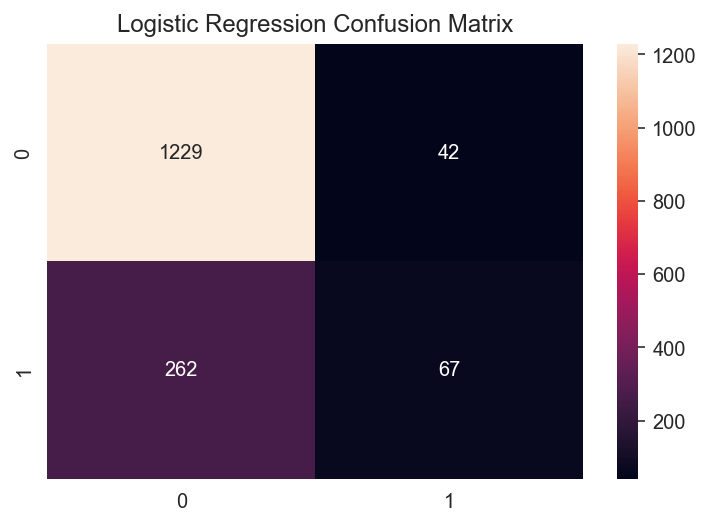

In [73]:
logreg_cm = confusion_matrix(y_test, logreg_pred)
sns.heatmap(logreg_cm, annot=True, fmt='d')
plt.title('Logistic Regression Confusion Matrix');

##### Classification Report

In [74]:
logreg_report = classification_report(y_test, logreg_pred)
print(f'Logistic Regression Classification Report\n\n{logreg_report}')

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1271
           1       0.61      0.20      0.31       329

    accuracy                           0.81      1600
   macro avg       0.72      0.59      0.60      1600
weighted avg       0.78      0.81      0.77      1600



In [75]:
logreg_precision = precision_score(y_test, logreg_pred) * 100
print(f'The Logistic Regression test precision accuracy:\n{logreg_precision:.2f}%')

The Logistic Regression test precision accuracy:
61.47%


In [76]:
logreg_recall = recall_score(y_test, logreg_pred) * 100
print(f'The Logistic Regression test recall accuracy:\n{logreg_recall:.2f}%')

The Logistic Regression test recall accuracy:
20.36%


## CV Best Logistic Regression Model

In [77]:
outer_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

logreg_cv_score = cross_val_score(best_logreg,
                                  X_train, y_train,
                                  cv=outer_skfold,
                                  scoring='roc_auc',
                                  n_jobs=-1,
                                  error_score='raise') * 100

print(f'The Logistic Regression mean cross-validation accuracy:\n{logreg_cv_score.mean():.2f}%\n+/- {logreg_cv_score.std():.2f} std')

The Logistic Regression mean cross-validation accuracy:
76.00%
+/- 2.48 std


In [78]:
logreg_cv_results = pd.DataFrame(logreg_cv_score, columns=['LogReg'])
logreg_cv_results

LogReg
0  78.752463
1  72.958190
2  77.606170
3  77.611778
4  73.046424

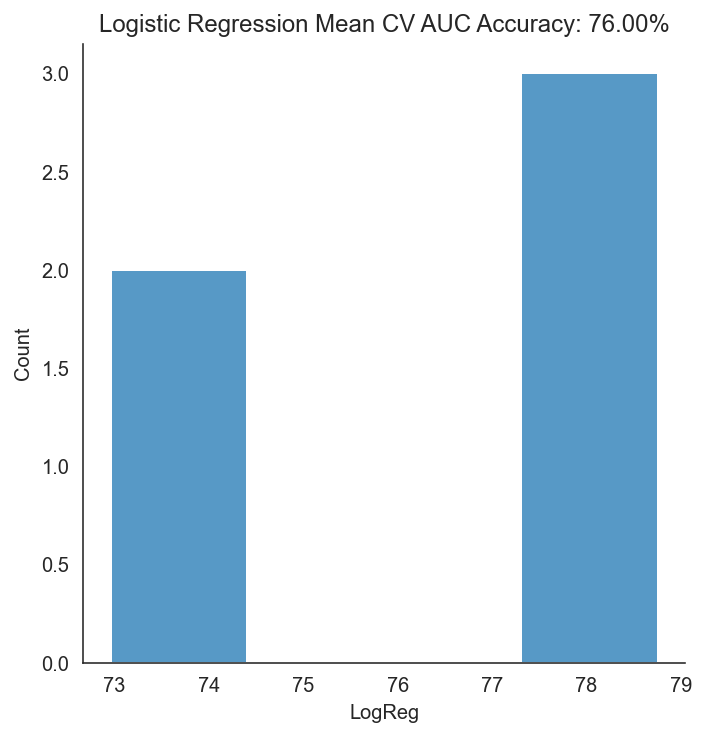

In [79]:
sns.displot(data=logreg_cv_results, x='LogReg')
plt.title(f'Logistic Regression Mean CV AUC Accuracy: {logreg_cv_score.mean():.2f}%');

## 2. Logistic Regression with Polynominal

In [80]:
logpoly_pipe = Pipeline([
    ('preprocessing', ct),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', logreg)
])

In [81]:
# logpoly_pipe.get_params()

In [82]:
logpoly_param_grid = {
    'model__C': [0.1, 0.5, 1, 10, 50, 100],
    'model__max_iter': range(50, 500, 50),
    'model__penalty': ['l1', 'l2']
}

In [83]:
logpoly_gs = GridSearchCV(
    logpoly_pipe,
    param_grid=logpoly_param_grid,
    scoring=metric,
    cv=skfold,
    n_jobs=-1,
    verbose=1,
)

In [84]:
%%time
logpoly_gs.fit(X_train, y_train);

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
CPU times: user 6.98 s, sys: 524 ms, total: 7.5 s
Wall time: 3min 43s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Geography',
                                                                          'Gender']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['CreditScore',
                                                                          'Age',
                                                                          'Tenure',
                                                                          

In [85]:
print(f'Best Logistic Regression Parameters:\n{logpoly_gs.best_params_}')

Best Logistic Regression Parameters:
{'model__C': 0.1, 'model__max_iter': 50, 'model__penalty': 'l1'}


In [86]:
print(f'Best Logistic Regression AUC Accuracy:\n{logpoly_gs.best_score_:.2f}%')

Best Logistic Regression AUC Accuracy:
0.85%


In [87]:
print('Logistic Regression Results:')
logpoly_results = pd.DataFrame(logpoly_gs.cv_results_)
logpoly_results

Logistic Regression Results:


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         1.403154      0.148010         0.012493        0.001969   
1         0.163997      0.007485         0.011455        0.001046   
2         1.525000      0.164628         0.013502        0.001036   
3         0.183797      0.006149         0.014697        0.002902   
4         1.577992      0.161383         0.013641        0.002184   
..             ...           ...              ...             ...   
103       0.289430      0.037093         0.015449        0.002289   
104       1.658289      0.799723         0.016734        0.003059   
105       0.288386      0.116899         0.014924        0.002974   
106       1.586800      0.602835         0.017194        0.010916   
107       0.240418      0.059900         0.013737        0.002293   

    param_model__C param_model__max_iter param_model__penalty  \
0              0.1                    50                   l1   
1              0.1                    50                   l2   
2              0.1                   100                   l1   
3              0.1                   100                   l2   
4              0.1                   150                   l1   
..             ...                   ...                  ...   
103            100                   350                   l2   
104            100                   400                   l1   
105            100                   400                   l2   
106            100                   450                   l1   
107            100                   450                   l2   

                                                params  split0_test_score  \
0    {'model__C': 0.1, 'model__max_iter': 50, 'mode...           0.861381   
1    {'model__C': 0.1, 'model__max_iter': 50, 'mode...           0.858051   
2    {'model__C': 0.1, 'model__max_iter': 100, 'mod...           0.861381   
3    {'model__C': 0.1, 'model__max_iter': 100, 'mod...           0.858051   
4    {'model__C': 0.1, 'model__max_iter': 150, 'mod...           0.861381   
..                                                 ...                ...   
103  {'model__C': 100, 'model__max_iter': 350, 'mod...           0.857541   
104  {'model__C': 100, 'model__max_iter': 400, 'mod...           0.857541   
105  {'model__C': 100, 'model__max_iter': 400, 'mod...           0.857541   
106  {'model__C': 100, 'model__max_iter': 450, 'mod...           0.857541   
107  {'model__C': 100, 'model__max_iter': 450, 'mod...           0.857541   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.824592           0.818549           0.865850   
1             0.825537           0.817844           0.866135   
2             0.824592           0.818549           0.865850   
3             0.825537           0.817844           0.866135   
4             0.824592           0.818549           0.865850   
..                 ...                ...                ...   
103           0.826137           0.818729           0.866330   
104           0.826137           0.818714           0.866345   
105           0.826137           0.818729           0.866330   
106           0.826137           0.818714           0.866345   
107           0.826137           0.818729           0.866330   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.845304           0.871660           0.859953   
1             0.844809           0.870705           0.858283   
2             0.845304           0.871660           0.859953   
3             0.844809           0.870705           0.858283   
4             0.845304           0.871660           0.859953   
..                 ...                ...                ...   
103           0.844524           0.870959           0.857462   
104           0.844539           0.870959           0.857462   
105           0.844524           0.870959           0.857462   
106           0.844539           0.870959           0.857462 

In [88]:
print(f'Best Logistic Regression Model:\n\n{logpoly_gs.best_estimator_}')

Best Logistic Regression Model:

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender']),
                                                 ('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary'])])),
                ('poly', PolynomialFeatures()),
                ('model',
                 LogisticRegression(C=0.1, max_iter=50, penalty='l1',
                                    random_state=999, solver='liblinear'))])


In [89]:
best_logpoly = logpoly_gs.best_estimator_

## Prediction on test set

In [90]:
logpoly_pred = best_logpoly.predict(X_test)

##### AUC

In [91]:
logpoly_auc_score = roc_auc_score(y_test, logpoly_pred) * 100
print(f'The Logistic Regression test AUC accuracy:\n{logpoly_auc_score:.2f}%') 

The Logistic Regression test AUC accuracy:
72.66%


##### Classification Report

In [92]:
logpoly_report = classification_report(y_test, logpoly_pred)
print(f'Logistic Regression Classification Report\n\n{logpoly_report}')

Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1271
           1       0.78      0.49      0.60       329

    accuracy                           0.87      1600
   macro avg       0.83      0.73      0.76      1600
weighted avg       0.86      0.87      0.85      1600



##### Precision

In [93]:
logpoly_precision = precision_score(y_test, logpoly_pred) * 100
print(f'The Logistic Regression test precision accuracy:\n{logpoly_precision:.2f}%')

The Logistic Regression test precision accuracy:
77.78%


##### Recall

In [94]:
logpoly_recall = recall_score(y_test, logpoly_pred) * 100
print(f'The Logistic Regression test recall accuracy:\n{logpoly_recall:.2f}%')

The Logistic Regression test recall accuracy:
48.94%


## CV Best LogReg Poly Model

In [95]:
outer_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

logpoly_cv_score = cross_val_score(best_logpoly,
                                   X_train, y_train,
                                   cv=outer_skfold,
                                   scoring='roc_auc',
                                   n_jobs=-1,
                                   error_score='raise') * 100

print(f'The Logistic Regression mean cross-validation accuracy:\n{logpoly_cv_score.mean():.2f}%\n+/- {logpoly_cv_score.std():.2f} std')

The Logistic Regression mean cross-validation accuracy:
85.05%
+/- 1.07 std


In [96]:
logpoly_cv_results = pd.DataFrame(logpoly_cv_score, columns=['LogRegPoly'])
logpoly_cv_results

LogRegPoly
0   84.483925
1   84.195296
2   85.824258
3   86.768285
4   83.988171

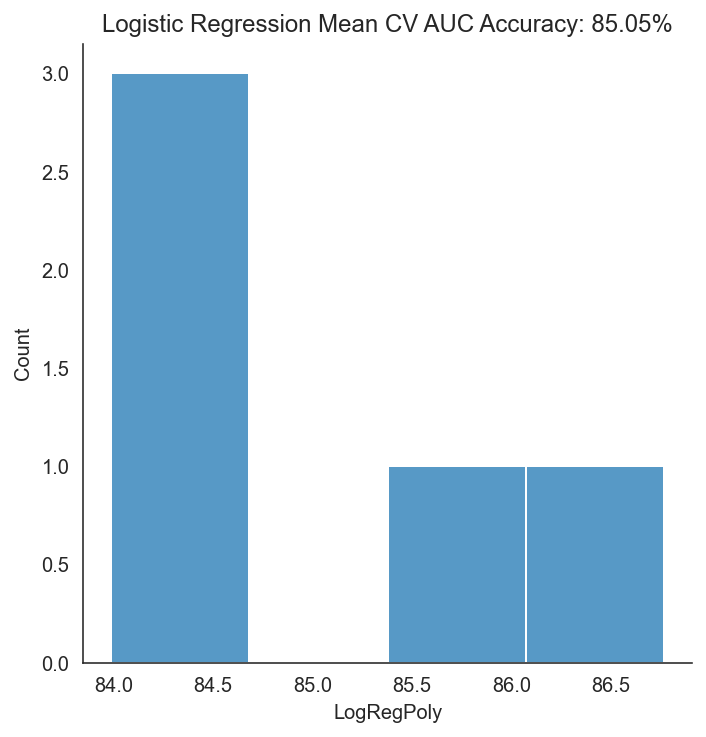

In [97]:
sns.displot(data=logpoly_cv_results, x='LogRegPoly')
plt.title(f'Logistic Regression Mean CV AUC Accuracy: {logpoly_cv_score.mean():.2f}%');

## 3. Random Forest

In [98]:
cat_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat)],
    remainder='passthrough')

In [99]:
rf = RandomForestClassifier(random_state=999)

rf_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', rf)
])

In [100]:
# rf_pipe.get_params()

In [101]:
rf_param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(1, 10),
    'model__min_samples_leaf': range(1, 10),
    'model__n_estimators': range(50, 500, 50)
}

In [102]:
rf_rs = RandomizedSearchCV(
    rf_pipe,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring=metric,
    cv=skfold,
    n_jobs=-1,
    verbose=1,
)

In [103]:
%%time
rf_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 2.72 s, sys: 110 ms, total: 2.83 s
Wall time: 44.4 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Geography',
                                                                                'Gender'])])),
                                             ('model',
                                              RandomForestClassifier(random_state=999))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__criterion': 

In [104]:
print(f'Best Random Forest Parameters:\n{rf_rs.best_params_}')

Best Random Forest Parameters:
{'model__n_estimators': 250, 'model__min_samples_leaf': 4, 'model__max_depth': 9, 'model__criterion': 'gini'}


In [105]:
print(f'Best Random Forest AUC Accuracy:\n{rf_rs.best_score_:.2f}%')

Best Random Forest AUC Accuracy:
0.86%


In [106]:
print('Random Forest Results:')
rf_results = pd.DataFrame(rf_rs.cv_results_)
rf_results

Random Forest Results:


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.097969      0.080656         0.034732        0.003053   
1        2.235004      0.040979         0.079325        0.002567   
2        0.495911      0.002162         0.029018        0.000377   
3        1.585177      0.018521         0.058945        0.003553   
4        0.485260      0.008957         0.021832        0.001119   
5        2.403618      0.009829         0.081752        0.003399   
6        2.444432      0.008307         0.098729        0.001646   
7        3.488135      0.019286         0.128475        0.003545   
8        0.437073      0.007413         0.029819        0.001927   
9        0.844564      0.022765         0.053287        0.002225   
10       0.896527      0.038205         0.059768        0.009508   
11       0.458668      0.015381         0.020476        0.000275   
12       0.854525      0.020200         0.043654        0.000924   
13       1.987387      0.024120         0.097524        0.003092   
14       0.886000      0.015301         0.037067        0.002623   
15       2.665937      0.095848         0.103795        0.008659   
16       3.940485      0.052843         0.126470        0.009882   
17       1.465090      0.039444         0.055389        0.005579   
18       0.881489      0.024914         0.040406        0.004918   
19       1.937404      0.203958         0.057787        0.009666   

   param_model__n_estimators param_model__min_samples_leaf  \
0                        100                             3   
1                        250                             6   
2                        100                             7   
3                        200                             1   
4                         50                             9   
5                        250                             4   
6                        350                             8   
7                        450                             1   
8                        100                             1   
9                        200                             6   
10                       200                             9   
11                        50                             4   
12                       150                             5   
13                       350                             6   
14                       100                             6   
15                       300                             4   
16                       350                             5   
17                       150                             4   
18                       100                             1   
19                       200                             8   

   param_model__max_depth param_model__criterion  \
0                       8                entropy   
1                       9                   gini   
2                       2                entropy   
3                       5                entropy   
4                       9                   gini   
5                       9                   gini   
6                       5                   gini   
7                       6                   gini   
8                       1                entropy   
9                       1                   gini   
10                      1                   gini   
11                      7                   gini   
12                      3                   gini   
13                      3                   gini   
14                      7                   gini   
15                      5                entropy   
16                      9                   gini   
17                      7                   gini   
18                      6                   gini   
19                      6                entropy   

                                               params  split0_test_score  \
0   {'model__n_estimators': 100, 'model__min_sampl...           0.870349   
1   {'model__n_estimators':

In [107]:
print(f'Best Random Forest Model:\n\n{rf_rs.best_estimator_}')

Best Random Forest Model:

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 RandomForestClassifier(max_depth=9, min_samples_leaf=4,
                                        n_estimators=250, random_state=999))])


In [108]:
best_rf = rf_rs.best_estimator_

## Prediction on test set

In [109]:
rf_pred = best_rf.predict(X_test)

##### AUC

In [110]:
rf_auc_score = roc_auc_score(y_test, rf_pred) * 100
print(f'The Random Forest test AUC accuracy:\n{rf_auc_score:.2f}%') 

The Random Forest test AUC accuracy:
71.14%


##### Classification Report

In [111]:
rf_report = classification_report(y_test, rf_pred)
print(f'Random Forest Classification Report\n\n{rf_report}')

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1271
           1       0.78      0.46      0.58       329

    accuracy                           0.86      1600
   macro avg       0.83      0.71      0.75      1600
weighted avg       0.85      0.86      0.85      1600



##### Precision

In [112]:
rf_precision = precision_score(y_test, rf_pred) * 100
print(f'The Random Forest test precision accuracy:\n{rf_precision:.2f}%')

The Random Forest test precision accuracy:
78.12%


##### Recall

In [113]:
rf_recall = recall_score(y_test, rf_pred) * 100
print(f'The Random Forest test recall accuracy:\n{rf_recall:.2f}%')

The Random Forest test recall accuracy:
45.59%


## CV Best RF Model

In [114]:
outer_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

rf_cv_score = cross_val_score(best_rf,
                              X_train, y_train,
                              cv=outer_skfold,
                              scoring='roc_auc',
                              n_jobs=-1,
                              error_score='raise') * 100

print(f'The Random Forest mean cross-validation accuracy:\n{rf_cv_score.mean():.2f}%\n +/- {rf_cv_score.std():.2f} std')

The Random Forest mean cross-validation accuracy:
85.39%
 +/- 1.17 std


In [115]:
rf_cv_results = pd.DataFrame(rf_cv_score, columns=['RandomForest'])
rf_cv_results

RandomForest
0     85.908379
1     84.517948
2     86.501340
3     86.471804
4     83.557470

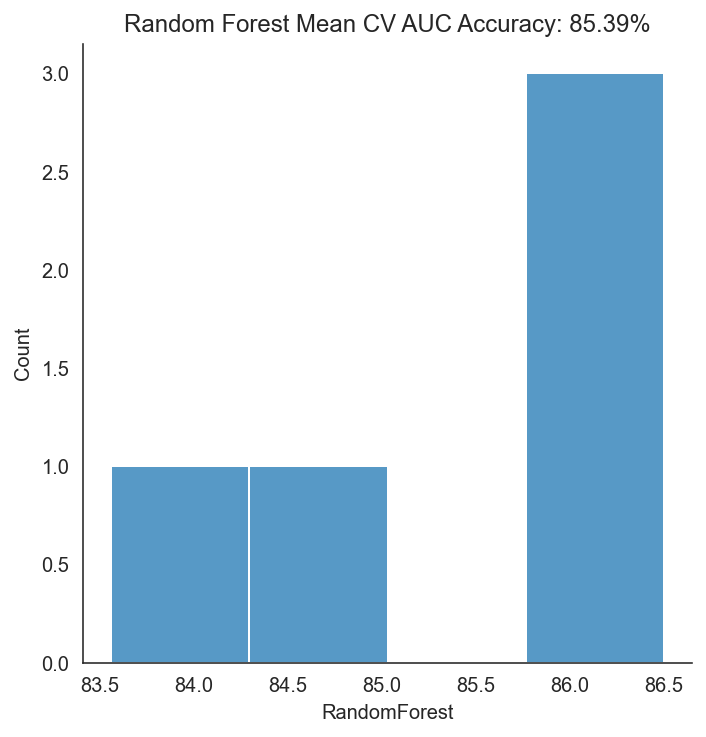

In [116]:
sns.displot(data=rf_cv_results, x='RandomForest')
plt.title(f'Random Forest Mean CV AUC Accuracy: {rf_cv_score.mean():.2f}%');

## 4. History Gradient Boosting

In [117]:
cat_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1) 

ct = ColumnTransformer([
    ('cat', cat_preprocessor, cat)],
    remainder='passthrough')

In [118]:
hgb = HistGradientBoostingClassifier(random_state=999)

hgb_pipe = Pipeline([
    ('preprocessing', ct),
    ('model', hgb)
])

In [119]:
# hgb_pipe.get_params()

In [120]:
hgb_param_grid = {
    'model__max_iter': range (100, 1000),
    'model__max_depth': range(1, 10),
    'model__learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
}

In [121]:
hgb_rs = RandomizedSearchCV(
    hgb_pipe,
    param_distributions=hgb_param_grid,
    n_iter=20,
    scoring=metric,
    cv=skfold,
    n_jobs=-1,
    verbose=1,
)

In [122]:
%%time
hgb_rs.fit(X_train, y_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits
CPU times: user 6.6 s, sys: 200 ms, total: 6.8 s
Wall time: 1min 11s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=999, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                              unknown_value=-1),
                                                                               ['Geography',
                                                                                'Gender'])])),
                                             ('model',
                                              HistGradientBoostingClassifier(random_state=999))]),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'model__lear

In [123]:
print(f'Best History Gradient Boosting Parameters:\n{hgb_rs.best_params_}')

Best History Gradient Boosting Parameters:
{'model__max_iter': 518, 'model__max_depth': 3, 'model__learning_rate': 0.01}


In [124]:
print(f'Best History Gradient Boostibg AUC Accuracy:\n{hgb_rs.best_score_:.2f}%')

Best History Gradient Boostibg AUC Accuracy:
0.86%


In [125]:
print('History Gradient Boosting Results:')
hgb_results = pd.DataFrame(hgb_rs.cv_results_)
hgb_results

History Gradient Boosting Results:


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.261426      0.197315         0.062875        0.008664   
1        2.606572      0.079104         0.052133        0.005314   
2        6.530546      0.207489         0.098399        0.002711   
3        1.183226      0.031865         0.025201        0.003535   
4        6.614727      0.036138         0.098509        0.004826   
5        1.229672      0.014765         0.045460        0.004639   
6        2.240588      0.064803         0.040588        0.014572   
7        2.528100      0.132697         0.059980        0.004336   
8        4.084211      0.167460         0.080696        0.002520   
9        1.976259      0.067130         0.028939        0.001504   
10       1.250942      0.034323         0.031090        0.001832   
11       3.749108      0.025845         0.065687        0.003062   
12       2.667663      0.053886         0.046434        0.002551   
13       1.281939      0.053106         0.061614        0.002702   
14       0.955562      0.016997         0.036908        0.000287   
15       0.279453      0.002647         0.021272        0.000565   
16       1.190600      0.016357         0.059265        0.005496   
17       3.794244      0.027705         0.066730        0.003185   
18       2.443732      0.044299         0.042391        0.001610   
19       3.652952      0.586037         0.055137        0.011776   

   param_model__max_iter param_model__max_depth param_model__learning_rate  \
0                    490                      7                        0.3   
1                    454                      5                       0.01   
2                    944                      7                        0.3   
3                    168                      8                        0.3   
4                    970                      8                        0.2   
5                    518                      3                       0.01   
6                    314                      6                       0.01   
7                    503                      5                        0.2   
8                    874                      5                        0.1   
9                    233                      9                     0.0001   
10                   296                      5                        0.2   
11                   679                      6                        0.3   
12                   450                      7                        0.1   
13                   975                      2                        0.2   
14                   511                      3                        0.1   
15                   294                      1                        0.1   
16                   933                      2                        0.2   
17                   720                      6                        0.3   
18                   418                      6                       0.01   
19                   793                      5                      0.001   

                                               params  split0_test_score  \
0   {'model__max_iter': 490, 'model__max_depth': 7...           0.818549   
1   {'model__max_iter': 454, 'model__max_depth': 5...           0.859191   
2   {'model__max_iter': 944, 'model__max_depth': 7...           0.817784   
3   {'model__max_iter': 168, 'model__max_depth': 8...           0.827322   
4   {'model__max_iter': 970, 'model__max_depth': 8...           0.821788   
5   {'model__max_iter': 518, 'model__max_depth': 3...           0.866772   
6   {'model__max_iter': 314, 'model__max_depth': 6...           0.858831   
7   {'model__max_iter': 503, 'model__max_depth': 5...           0.821773   
8   {'model__max_iter': 874, 'model__max_depth': 5...           0.811785   
9   {'model__max_iter': 233, 'model__max_depth': 9...           0.831454   
10  {'model__max_iter': 296, 'model__max_depth': 5...           0.822748   
11  {'model__max_iter': 

In [126]:
print(f'Best History Gradient Boosting Model:\n\n{hgb_rs.best_estimator_}')

Best History Gradient Boosting Model:

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Geography', 'Gender'])])),
                ('model',
                 HistGradientBoostingClassifier(learning_rate=0.01, max_depth=3,
                                                max_iter=518,
                                                random_state=999))])


In [127]:
best_hgb = hgb_rs.best_estimator_

## Prediciton on test set

In [128]:
hgb_pred = best_hgb.predict(X_test)

##### AUC

In [129]:
hgb_auc_score = roc_auc_score(y_test, hgb_pred) * 100
print(f'The History Gradient Boosting test AUC accuracy:\n{hgb_auc_score:.2f}%') 

The History Gradient Boosting test AUC accuracy:
71.68%


##### Classification Report

In [130]:
hgb_report = classification_report(y_test, hgb_pred)
print(f'History Gradient Classification Report\n\n{hgb_report}')

History Gradient Classification Report

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1271
           1       0.79      0.47      0.59       329

    accuracy                           0.86      1600
   macro avg       0.83      0.72      0.75      1600
weighted avg       0.86      0.86      0.85      1600



##### Precision

In [131]:
hgb_precision = precision_score(y_test, hgb_pred) * 100
print(f'The History Gradient Boosting test precision accuracy:\n{hgb_precision:.2f}%')

The History Gradient Boosting test precision accuracy:
79.27%


##### Recall

In [132]:
hgb_recall = recall_score(y_test, hgb_pred) * 100
print(f'The History Gradient Boosting test recall accuracy:\n{hgb_recall:.2f}%')

The History Gradient Boosting test recall accuracy:
46.50%


In [133]:
outer_skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

hgb_cv_score = cross_val_score(best_hgb,
                               X_train, y_train,
                               cv=outer_skfold,
                               scoring='roc_auc',
                               n_jobs=-1,
                               error_score='raise') * 100

print(f'The History Gradient Boosting mean cross-validation accuracy:\n{hgb_cv_score.mean():.2f}%\n +/- {hgb_cv_score.std():.2f} std')

The History Gradient Boosting mean cross-validation accuracy:
85.78%
 +/- 0.99 std


In [134]:
hgb_cv_results = pd.DataFrame(hgb_cv_score, columns=['HistoryGradientBoosting'])
hgb_cv_results

HistoryGradientBoosting
0                85.544040
1                85.537311
2                86.645468
3                86.980458
4                84.172490

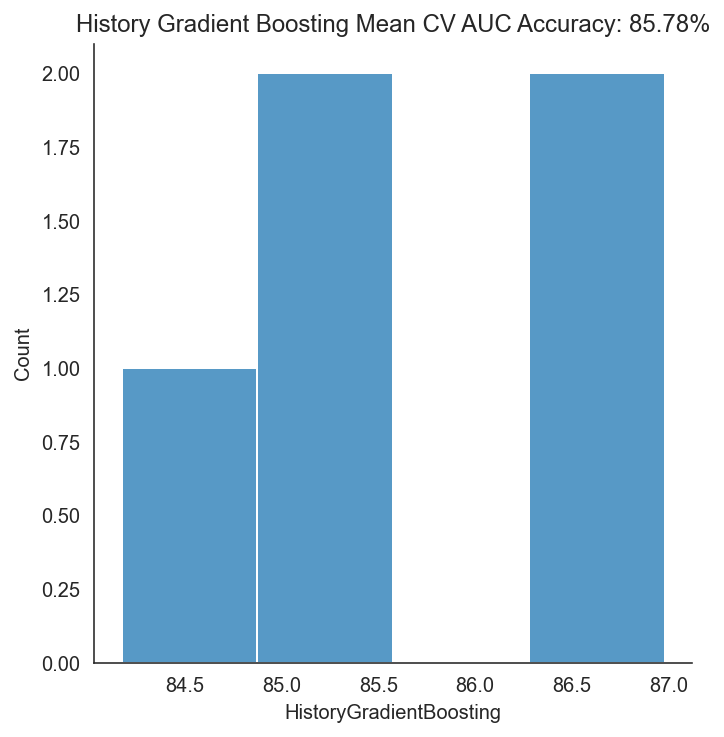

In [135]:
sns.displot(data=hgb_cv_results, x='HistoryGradientBoosting')
plt.title(f'History Gradient Boosting Mean CV AUC Accuracy: {hgb_cv_score.mean():.2f}%');

## Compare Model Results

In [136]:
model_results = pd.concat([logreg_cv_results, logpoly_cv_results, rf_cv_results, hgb_cv_results], axis=1)
model_results

LogReg  LogRegPoly  RandomForest  HistoryGradientBoosting
0  78.752463   84.483925     85.908379                85.544040
1  72.958190   84.195296     84.517948                85.537311
2  77.606170   85.824258     86.501340                86.645468
3  77.611778   86.768285     86.471804                86.980458
4  73.046424   83.988171     83.557470                84.172490

In [137]:
model_results.describe()

LogReg  LogRegPoly  RandomForest  HistoryGradientBoosting
count   5.000000    5.000000      5.000000                 5.000000
mean   75.995005   85.051987     85.391388                85.775953
std     2.771722    1.196913      1.303143                 1.105522
min    72.958190   83.988171     83.557470                84.172490
25%    73.046424   84.195296     84.517948                85.537311
50%    77.606170   84.483925     85.908379                85.544040
75%    77.611778   85.824258     86.471804                86.645468
max    78.752463   86.768285     86.501340                86.980458

## Summary

From the above results, our aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the 1's is of more importance than the overall accuracy score of the model.

From EDA, we saw that we had about 20% of churn, a recall greater than this baseline will already be an improvement but we want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.
    
From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the History Gradient Boosting model where according to the fit on the training set, with a precision score on 1's of 0.79, out of all customers that the model thinks will churn, 79% do actually churn and with the recall score of 0.49 on the 1's, the model is able to highlight almost 50% of all those who churned.